# **API_2_Vasquez_Jorge_Luis - Machine Learning**


### Situación: 
##### Estudio sobre datos del Titanic, entrenar un modelo para predecir logra sobrevivir o no

### Consigna:
##### Generar un modelo  de regresión logística que permita calcular  el grado de ** accuracy ** con el cual se pueda determinar, en el grupo de prueba, quienes son los sobrevivientes del Titanic.

#### Cargo las librerias correspondientes

In [24]:
# importar las librias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

%matplotlib inline

### Informacion sobre los datos que contienen los data set del Titanic

| Variable | Definition                                   | Key                                      |
|----------|-----------------------------------------------|-------------------------------------------|
| survival | Survival                                      | 0 = No, 1 = Yes                           |
| pclass   | Ticket class                                  | 1 = 1st, 2 = 2nd, 3 = 3rd                 |
| sex      | Sex                                           |                                           |
| age      | Age in years                                  |                                           |
| sibsp    | # of siblings / spouses aboard the Titanic    |                                           |
| parch    | # of parents / children aboard the Titanic    |                                           |
| ticket   | Ticket number                                 |                                           |
| fare     | Passenger fare                                |                                           |
| cabin    | Cabin number                                  |                                           |
| embarked | Port of Embarkation                           | C = Cherbourg, Q = Queenstown, S = Southampton |


| Variable | Notas |
|---------|-------|
| **pclass** | • Indicador aproximado del estatus socioeconómico (SES):<br> ▪ 1st: Clase alta<br> ▪ 2nd: Clase media<br> ▪ 3rd: Clase baja |
| **age** | • La edad es fraccionaria si el pasajero tiene menos de 1 año.<br>• Si la edad es estimada, aparece en formato **xx.5**. |
| **sibsp** | • El dataset define las relaciones familiares así:<br> ▪ **Sibling (hermano/a):** hermano, hermana, hermanastro, hermanastra<br> ▪ **Spouse (cónyuge):** esposo, esposa<br>• (Las amantes y novios/as no fueron considerados). |
| **parch** | • El dataset define las relaciones familiares así:<br> ▪ **Parent (padre/madre):** madre, padre<br> ▪ **Child (hijo/a):** hija, hijo, hijastro, hijastra<br>• Algunos niños viajaban solo con una niñera, por lo que **parch = 0**. |


#### Armo los Data Frames de train y test

In [2]:
# Cargar los data frame de train y test
train = pd.read_csv("train.csv")
#test = pd.read_csv("test.csv")

#### Informacion de los data frame


##### Solo muestro los shape de ambos data frame, y comienzo a trabajar con train

In [3]:
# muestro el shape de train y test
print("Train shape:")
print("Cantidad de pasajeros y colunas:", train.shape[0], "x", train.shape[1])
#print("\nTest shape:")
#print("Cantidad de pasajeros y colunas:", test.shape[0], "x", test.shape[1])

# muestro las primeras filas de train
train.head()



Train shape:
Cantidad de pasajeros y colunas: 891 x 12


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
# muestro las primeras filas de test
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


##### Muestro la informacion de train para determinar datos faltantes

In [21]:
# muestro informacion de train
print("Información del conjunto de entrenamiento:\n")
train.info()

Información del conjunto de entrenamiento:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### Revisdo los datos nulos

##### Trabajo con la edad y cabina

In [22]:
# verificar datos nulos
print("\nDatos nulos en el conjunto de entrenamiento:\n")
print(train.isnull().sum())

# si tengo dudas a la hora imputar una variable por mucha cantidad de datos nulos puedo ver la distribucion de la variable
# ejemplo con la variable Age
print("\nPorsentaje de datos nulos en la variable Age:", train['Age'].isnull().mean() * 100, "% \n")
print("Porsentaje de datos nulos en la variable Cabin:", train['Cabin'].isnull().mean() * 100, "% \n")


Datos nulos en el conjunto de entrenamiento:

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Porsentaje de datos nulos en la variable Age: 19.865319865319865 % 

Porsentaje de datos nulos en la variable Cabin: 77.10437710437711 % 



##### Grafico las columnas con datos nulos a modo de visualizzación ( extra )

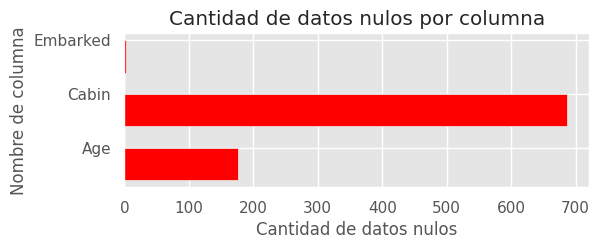

In [29]:
sns.set(font_scale=1)
plt.style.use('ggplot')
null_columns = train.columns[train.isnull().any()]
labels = []
values = []

for col in null_columns:
    labels.append(col)
    values.append(train[col].isnull().sum())

ind = np.arange(len(labels))
ind
width = 0.6
fig, ax = plt.subplots(figsize=(6, 2))
rects = ax.barh(ind, values, width, color='red')
ax.set_yticks(ind + (width / 2))
ax.set_yticklabels(labels, rotation='horizontal')
ax.set_xlabel('Cantidad de datos nulos')
ax.set_ylabel("Nombre de columna")
ax.set_title('Cantidad de datos nulos por columna')
plt.show()


##### Convierto los datos a número, ya que para entrenar un modelo todo debe ser numérico

In [31]:
# Uso LabelEncoder para convertir las variables categóricas en numéricas
from sklearn.preprocessing import LabelEncoder  

pre_columns = ["Sex", "Embarked"]
for col in pre_columns:
    encoder = LabelEncoder()
    train[col] = encoder.fit_transform(train[col].astype(str))

# check train
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 83.7+ KB


##### Imputar los datos faltantes, voy a corregir Age y Embarked, que son los más potables a imputar. Cabin lo voy a descartar ya que la cantidad de datos faltantes es mucha y no tengo como hacerlo.

##### Para hacer esto y luego de investigar un poco voy a usar el modelo de vecino cercano, para eso utilizo **from sklearn.imput import KNNImputer**, espero quede bien 

In [32]:
# uso el modelo de vecino cercano KNN para imputar
from sklearn.impute import KNNImputer
imputer_columns = ["Age", "Embarked"]
imputer = KNNImputer(n_neighbors=5, weights="uniform")
train[imputer_columns] = imputer.fit_transform(train[imputer_columns])



In [ ]:
# nuestro la informacion luego de la imputacion
display(train[imputer_columns].info())
display(train[imputer_columns].sample(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       891 non-null    float64
 1   Embarked  891 non-null    float64
dtypes: float64(2)
memory usage: 14.0 KB


None

,Age,Embarked
132,47.0,2.0
639,31.4,2.0
517,22.4,1.0
713,29.0,2.0
302,19.0,2.0


##### Selecciono los datos par el modelo, solo elijo los que me pueden servir para realizar una tendencia

In [36]:
# Una vez limpio el set de datos, elioj las columnas que me pueden servir para entrenar el modelo
# 1- No analizo Cabin, ya que tiene muchos datos nulos
# 2- No analizo Name, Ticket y PassengerId, ya que no aportan nada al modelo y podrian generar subajuste
# 3- Elijo las columnas: Pclass, Sex, Age, SibSp, Parch, Fare, Embarked

end_columns = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]
